In [ ]:
import numpy as np
from scipy.spatial import Voronoi, distance
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


def clustering_vecindarios(S, theta):
    # Convertir S a un array de numpy
    S = np.array(S)

    # Construir el árbol KD para encontrar vecinos de manera eficiente
    kdtree = KDTree(S)

    # Inicializar variables
    visitados = np.zeros(len(S), dtype=bool)
    clusters = []
    labels = np.full(len(S), -1, dtype=int)

    def encontrar_vecinos(punto, theta):
        indices = kdtree.query_radius([punto], r=theta)[0]
        return indices

    cluster_idx = 0
    # Procesar todos los puntos
    while not all(visitados):
        # Seleccionar el primer punto no visitado
        idx = np.where(~visitados)[0][0]
        p = S[idx]

        # Inicializar el nuevo cluster y listas temporales
        cluster_actual = []
        temp_1 = [p]
        visitados[idx] = True
        labels[idx] = cluster_idx

        while temp_1:
            p_actual = temp_1.pop()
            cluster_actual.append(p_actual)

            # Encontrar vecinos del punto actual
            vecinos_indices = encontrar_vecinos(p_actual, theta)

            for vecino_idx in vecinos_indices:
                if not visitados[vecino_idx]:
                    visitados[vecino_idx] = True
                    temp_1.append(S[vecino_idx])
                    labels[vecino_idx] = cluster_idx

        clusters.append(np.array(cluster_actual))
        cluster_idx += 1

    return clusters, labels



def clustering_kmeans(X, nClusters, max_iters=300):

    kmeans = KMeans(n_clusters=nClusters, max_iter=max_iters, random_state=42)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    return centroids, labels

#Generar diferentes conjuntos de datos
def GenerateDatasets(selectedNoise, nClusters):

    # Datos tipo círculos
    X_circles, _ = make_circles(n_samples=1000, factor=0.3, noise=selectedNoise, random_state=0)

    # Datos tipo blobs
    X_blobs, _ = make_blobs(n_samples=1000, centers=nClusters, cluster_std=selectedNoise, random_state=0)

    # Datos tipo lunas
    X_moons, _ = make_moons(n_samples=1000, noise=selectedNoise, random_state=0)

    return X_circles, X_blobs, X_moons

def CalculateMSE(X, labels, centroids):
    return np.sum((X - centroids[labels])**2) / X.shape[0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


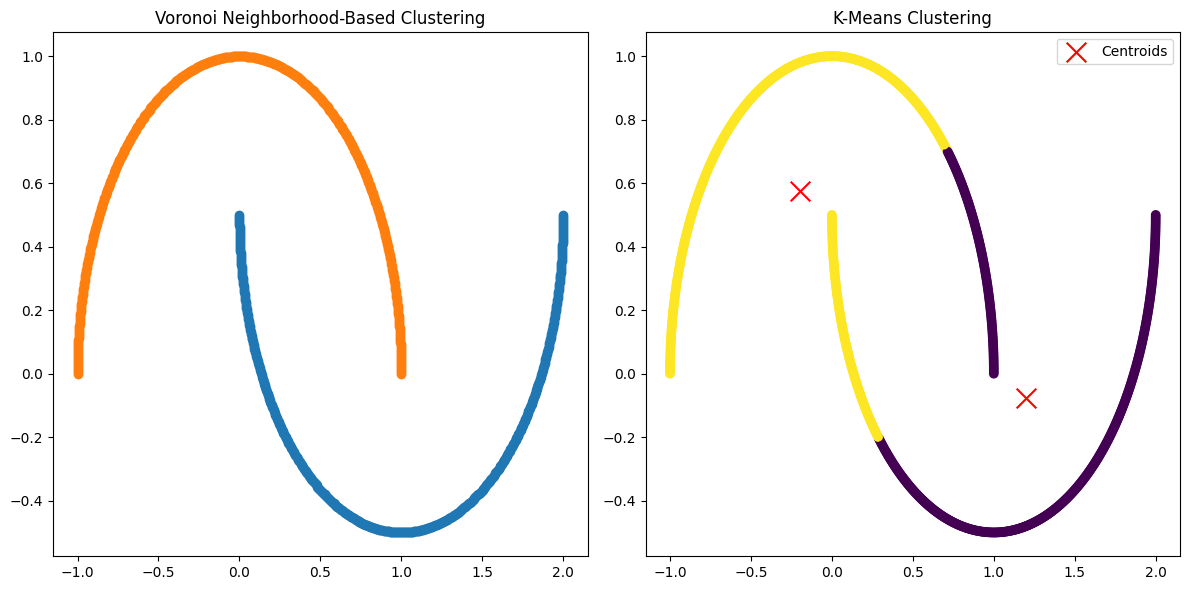

In [ ]:

# Ejemplo de uso:
nClusters = 2
X_circles, X_blobs, X_moons = GenerateDatasets(0.0, nClusters)
theta = 0.1
clusters, labels = clustering_vecindarios(X_moons, theta)
centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])

clusters_kmeans, labels_kmeans = clustering_kmeans(X_moons, nClusters)


# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot neighborhood-based clustering
for idx, cluster in enumerate(clusters):
    axs[0].scatter(cluster[:, 0], cluster[:, 1])
axs[0].set_title('Voronoi Neighborhood-Based Clustering')

# Plot k-means clustering
scatter = axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans, cmap='viridis')
centroids_kmeans = clusters_kmeans
axs[1].scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, marker='x', label='Centroids')
axs[1].set_title('K-Means Clustering')
axs[1].legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


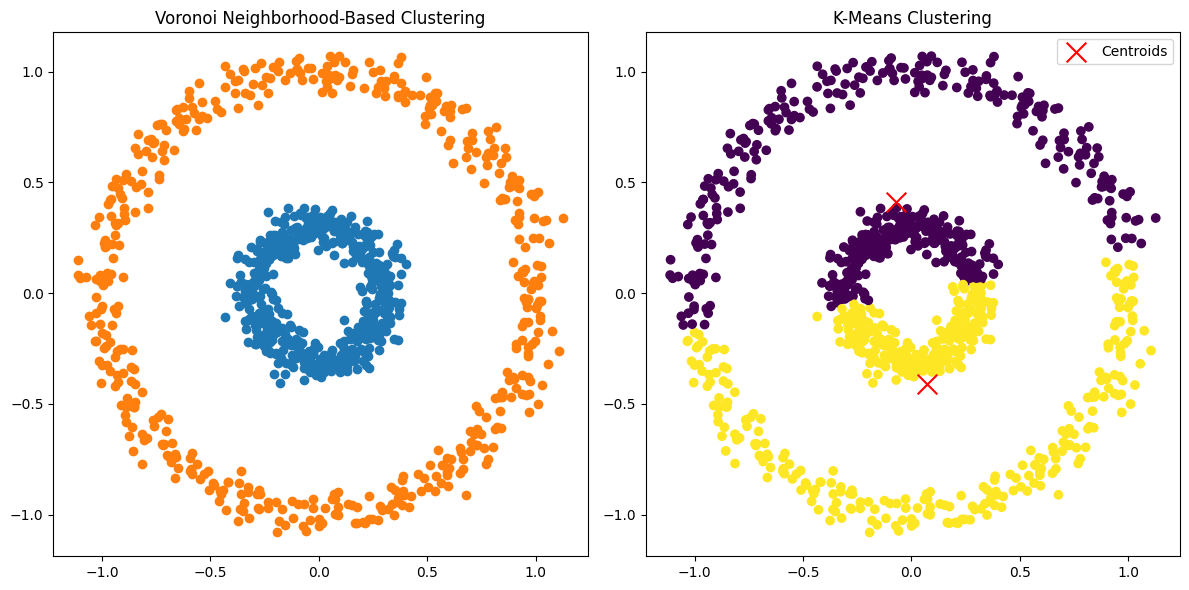

In [ ]:

# Ejemplo de uso:
nClusters = 2
X_circles, X_blobs, X_moons = GenerateDatasets(0.05, nClusters)
theta = 0.1
clusters, labels = clustering_vecindarios(X_circles, theta)
centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])


clusters_kmeans, labels_kmeans = clustering_kmeans(X_circles, nClusters)


# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot neighborhood-based clustering
for idx, cluster in enumerate(clusters):
    axs[0].scatter(cluster[:, 0], cluster[:, 1])
axs[0].set_title('Voronoi Neighborhood-Based Clustering')

# Plot k-means clustering
scatter = axs[1].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_kmeans, cmap='viridis')
centroids_kmeans = clusters_kmeans
axs[1].scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, marker='x', label='Centroids')
axs[1].set_title('K-Means Clustering')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

def clustering_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels_dbscan = dbscan.fit_predict(X)
    unique_labels = np.unique(labels_dbscan)
    clusters_dbscan = [X[labels_dbscan == label] for label in unique_labels if label != -1]
    return clusters_dbscan, labels_dbscan

In [ ]:
# Ejemplo de uso:
nClusters = 2
X_circles, X_blobs, X_moons = GenerateDatasets(0.05, nClusters)

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import itertools

def optimize_dbscan(X, eps_values, min_samples_values, lambda_=0.1):
    best_score = -float('inf')
    best_params = {}

    for eps, min_samples in itertools.product(eps_values, min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Verifica que haya más de un cluster para calcular la silueta
        num_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
        if num_clusters > 1:
            sil_score = silhouette_score(X, labels)

            # Penaliza por el número de clusters
            penalized_score = sil_score - lambda_ * num_clusters

            if penalized_score > best_score:
                best_score = penalized_score
                best_params = {'eps': eps, 'min_samples': min_samples}

    return best_params, best_score

eps_values = np.arange(0.1, 0.5, 0.05)
min_samples_values = range(3, 15)
best_params, best_score = optimize_dbscan(X_circles, eps_values, min_samples_values)

print(f"Mejores parámetros: eps = {best_params['eps']}, min_samples = {best_params['min_samples']}")
print(f"Mejor score: {best_score}")


Mejores parámetros: eps = 0.1, min_samples = 3
Mejor score: 0.0077525543389836415


In [ ]:

def optimize_clustering_vecindarios(S, theta_values, lambda_=0.1):
    best_score = -float('inf')
    best_theta = None

    for theta in theta_values:
        clusters, labels = clustering_vecindarios(S, theta)

        # Verifica que haya más de un cluster para calcular la silueta
        if len(np.unique(labels)) > 1:
            sil_score = silhouette_score(S, labels)
            num_clusters = len(np.unique(labels))

            # Penaliza por el número de clusters
            penalized_score = sil_score - lambda_ * (num_clusters / len(S))

            if penalized_score > best_score:
                best_score = penalized_score
                best_theta = theta

    return best_theta, best_score

theta_values = np.arange(0.01, 2.0, 0.1)
best_theta, best_score = optimize_clustering_vecindarios(X_circles, theta_values, lambda_=0.1)

print(f"Mejor theta: {best_theta}")
print(f"Mejor Score Final: {best_score}")



Mejor theta: 0.11
Mejor Score Final: 0.20755255433898365


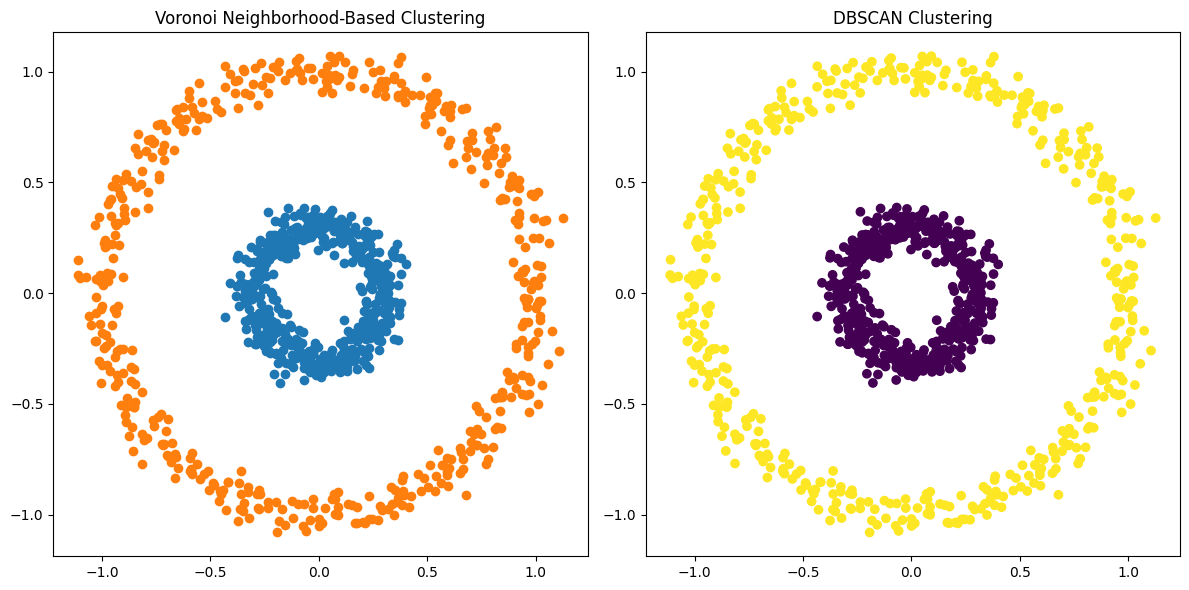

In [ ]:

theta = 0.11
clusters, labels = clustering_vecindarios(X_circles, theta)
centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])


eps = 0.1
min_samples = 3

clusters_dbscan, labels_dbscan = clustering_dbscan(X_circles, eps, min_samples)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot neighborhood-based clustering
for idx, cluster in enumerate(clusters):
    axs[0].scatter(cluster[:, 0], cluster[:, 1])
axs[0].set_title('Voronoi Neighborhood-Based Clustering')

# Plot DBSCAN clustering
scatter = axs[1].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_dbscan, cmap='viridis')
axs[1].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

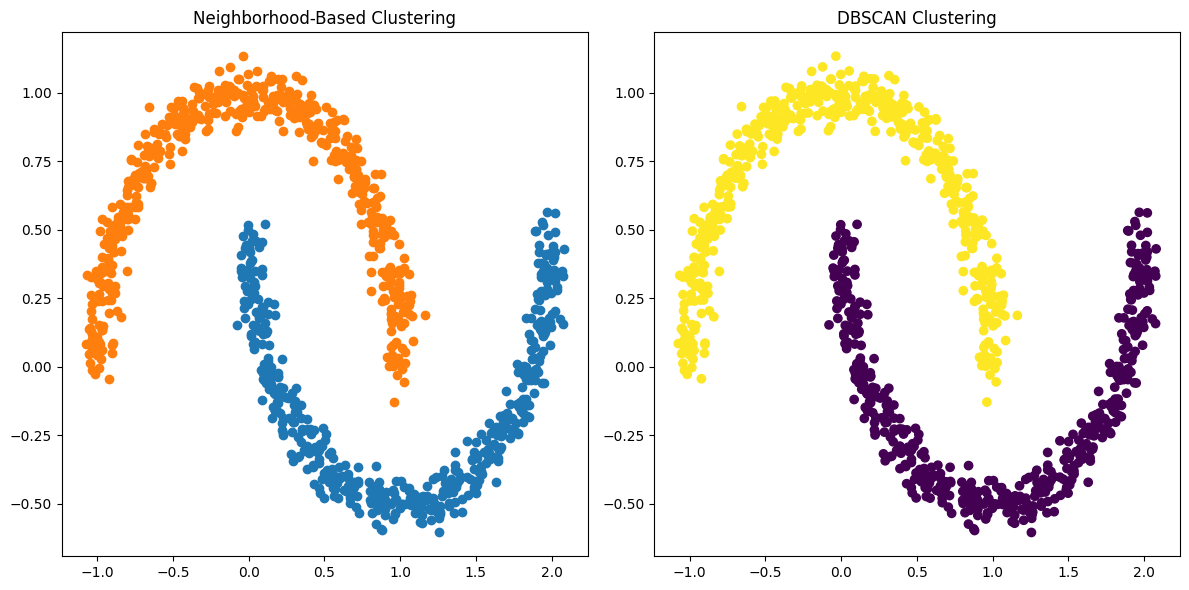

In [ ]:

# Ejemplo de uso:

theta = 0.1
clusters, labels = clustering_vecindarios(X_moons, theta)
centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])


eps = 0.1
min_samples = 3

clusters_dbscan, labels_dbscan = clustering_dbscan(X_moons, eps, min_samples)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot neighborhood-based clustering
for idx, cluster in enumerate(clusters):
    axs[0].scatter(cluster[:, 0], cluster[:, 1])
axs[0].set_title('Neighborhood-Based Clustering')

# Plot DBSCAN clustering
scatter = axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan, cmap='viridis')
axs[1].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

Ventaja con respecto a dbscan: sólo hay que optimizar un parámetro


In [ ]:
nClusters = 2
X_circles, X_blobs, X_moons = GenerateDatasets(0.1, nClusters)

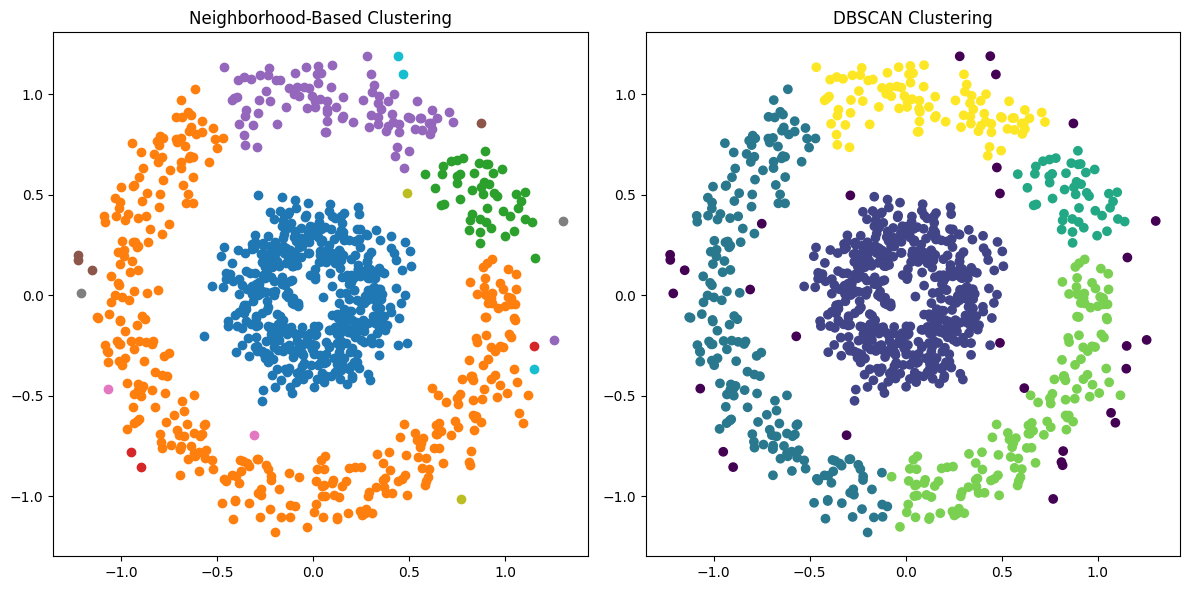

In [ ]:

theta = 0.1
clusters, labels = clustering_vecindarios(X_circles, theta)
centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])


eps = 0.1
min_samples = 5

clusters_dbscan, labels_dbscan = clustering_dbscan(X_circles, eps, min_samples)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot neighborhood-based clustering
for idx, cluster in enumerate(clusters):
    axs[0].scatter(cluster[:, 0], cluster[:, 1])
axs[0].set_title('Neighborhood-Based Clustering')

# Plot DBSCAN clustering
scatter = axs[1].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_dbscan, cmap='viridis')
axs[1].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

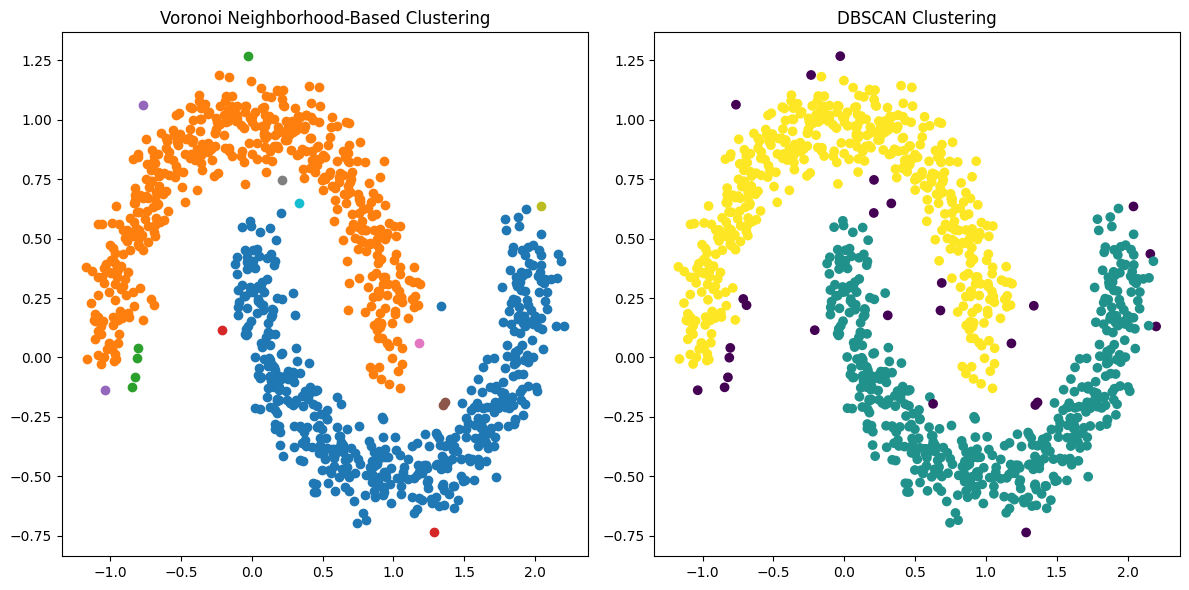

In [ ]:

# Ejemplo de uso:
nClusters = 2
X_circles, X_blobs, X_moons = GenerateDatasets(0.1, nClusters)
theta = 0.1
clusters, labels = clustering_vecindarios(X_moons, theta)
centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])


eps = 0.1
min_samples = 5

clusters_dbscan, labels_dbscan = clustering_dbscan(X_moons, eps, min_samples)


# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot neighborhood-based clustering
for idx, cluster in enumerate(clusters):
    axs[0].scatter(cluster[:, 0], cluster[:, 1])
axs[0].set_title('Voronoi Neighborhood-Based Clustering')

# Plot DBSCAN clustering
scatter = axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan, cmap='viridis')
axs[1].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

def GenerateDatasetsWithDifferentDensities(selectedNoise, nClusters):
    """
    Genera datasets con clusters de diferentes densidades.

    Args:
    selectedNoise (float): Nivel de ruido base para el dataset.
    nClusters (int): Número de clusters a generar.

    Returns:
    X_different_densities (ndarray): Dataset con clusters de diferentes densidades.
    labels (ndarray): Etiquetas verdaderas para cada punto en el dataset.
    """

    # Centroides aleatorios para los clusters
    centers = np.random.uniform(-10, 10, (nClusters, 2))

    # Generar diferentes desviaciones estándar para cada cluster (densidades)
    cluster_stds = np.random.uniform(0.1, selectedNoise, nClusters)

    # Generar los datos usando make_blobs con las diferentes densidades
    X_different_densities, labels = make_blobs(n_samples=1000, centers=centers, cluster_std=cluster_stds, random_state=0)

    return X_different_densities, labels


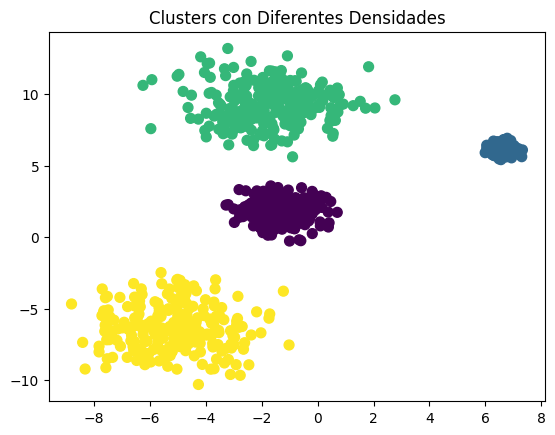

In [ ]:
selectedNoise = 2
nClusters = 4

X_different_densities, labels = GenerateDatasetsWithDifferentDensities(selectedNoise, nClusters)

# Puedes visualizar el resultado
import matplotlib.pyplot as plt

plt.scatter(X_different_densities[:, 0], X_different_densities[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Clusters con Diferentes Densidades")
plt.show()

In [ ]:
eps_values = np.arange(0.1, 3, 0.1)
min_samples_values = range(3, 30)
best_params, best_score = optimize_dbscan(X_different_densities, eps_values, min_samples_values)

print(f"Mejores parámetros: eps = {best_params['eps']}, min_samples = {best_params['min_samples']}")
print(f"Mejor score: {best_score}")

Mejores parámetros: eps = 1.9000000000000001, min_samples = 3
Mejor score: 0.38171564428831917


In [ ]:

theta_values = np.arange(0.1, 3.0, 0.1)
best_theta, best_score = optimize_clustering_vecindarios(X_different_densities, theta_values, lambda_=0.1)
print(f"Mejor theta: {best_theta}")
print(f"Mejor Score Final: {best_score}")

Mejor theta: 1.9000000000000001
Mejor Score Final: 0.7813156442883192


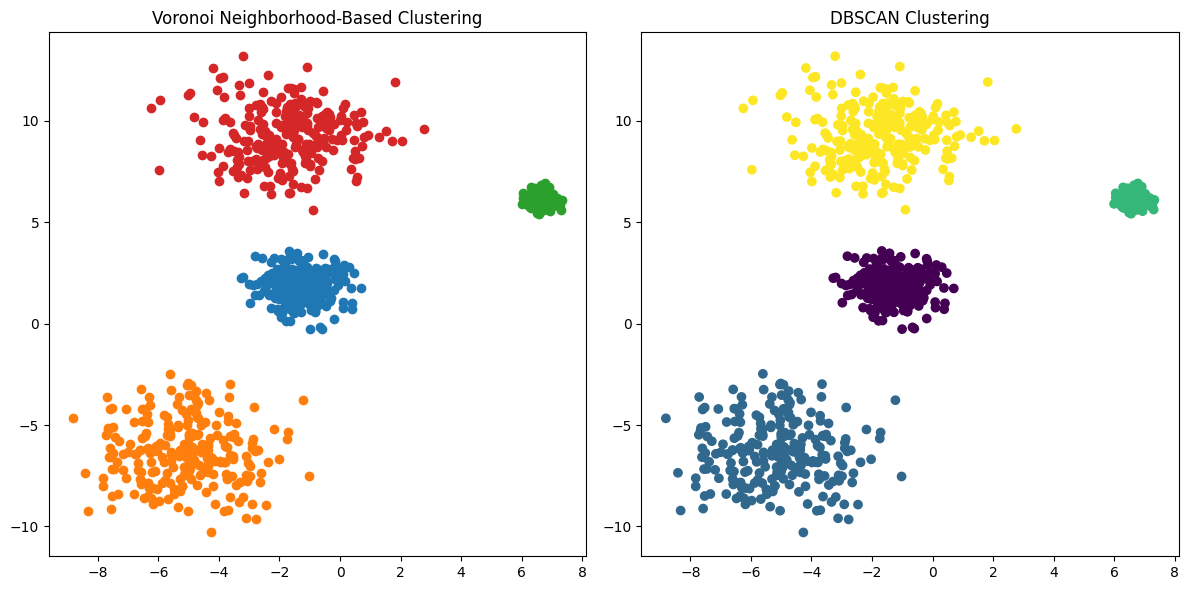

In [ ]:
theta = 1.9
clusters, labels = clustering_vecindarios(X_different_densities, theta)
centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])


eps = 1.9
min_samples = 3

clusters_dbscan, labels_dbscan = clustering_dbscan(X_different_densities, eps, min_samples)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot neighborhood-based clustering
for idx, cluster in enumerate(clusters):
    axs[0].scatter(cluster[:, 0], cluster[:, 1])
axs[0].set_title('Voronoi Neighborhood-Based Clustering')

# Plot DBSCAN clustering
scatter = axs[1].scatter(X_different_densities[:, 0], X_different_densities[:, 1], c=labels_dbscan, cmap='viridis')
axs[1].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()